In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

import time

In [0]:
!wget https://raw.githubusercontent.com/dhrim/cup_deeplearning_seminar/master/%EA%B5%90%EC%9C%A1%EC%9E%90%EB%A3%8C/deep_learning/iris.csv

--2019-07-23 02:49:11--  https://raw.githubusercontent.com/dhrim/cup_deeplearning_seminar/master/%EA%B5%90%EC%9C%A1%EC%9E%90%EB%A3%8C/deep_learning/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2720 (2.7K) [text/plain]
Saving to: ‘iris.csv.2’

iris.csv.2          100%[===================>]   2.66K  --.-KB/s    in 0s      

2019-07-23 02:49:11 (30.8 MB/s) - ‘iris.csv.2’ saved [2720/2720]



In [0]:
iris = pd.read_csv("iris.csv")
iris.head()

,septal_length,septal_width,petal_length,petal_width,setosa,versicolor,virginica
0,6.4,2.8,5.6,2.2,0,0,1
1,5.0,2.3,3.3,1.0,0,1,0
2,4.9,2.5,4.5,1.7,0,0,1
3,4.9,3.1,1.5,0.1,1,0,0
4,5.7,3.8,1.7,0.3,1,0,0


In [0]:

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
septal_length    120 non-null float64
septal_width     120 non-null float64
petal_length     120 non-null float64
petal_width      120 non-null float64
setosa           120 non-null int64
versicolor       120 non-null int64
virginica        120 non-null int64
dtypes: float64(4), int64(3)
memory usage: 6.6 KB


In [0]:
data = iris.to_numpy()
print(data.shape)
print(data[:5])

(120, 7)
[[6.4 2.8 5.6 2.2 0.  0.  1. ]
 [5.  2.3 3.3 1.  0.  1.  0. ]
 [4.9 2.5 4.5 1.7 0.  0.  1. ]
 [4.9 3.1 1.5 0.1 1.  0.  0. ]
 [5.7 3.8 1.7 0.3 1.  0.  0. ]]


In [0]:
x = data[:,:4]
y = data[:,4:]

split_index = 100

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]


print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(100, 4)
(100, 3)
(20, 4)
(20, 3)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
elapsed : 6.541242837905884
20/20 [==============================] - 0s 809us/sample - loss: 0.0152 - mean_squared_error: 0.0152
loss= 0.015248243696987629
mse= 0.015248244


ValueError: ignored

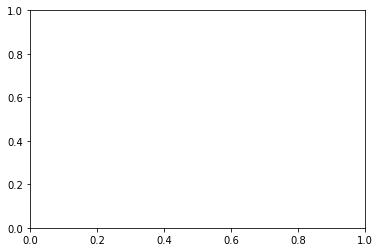

In [0]:
# (train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh', input_shape=(4,)))
model.add(Dense(10, activation='tanh'))
# model.add(Dense(1))
model.add(Dense(3))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mse=", mse)
              


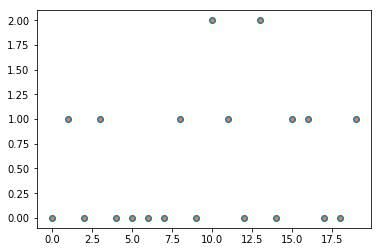

In [0]:
y_ = model.predict(test_x)

# plt.scatter(test_x,test_y)
# plt.scatter(test_x,y_, color="r")
# plt.show()

y_index = np.argmax(test_y, axis=1) # ADDED
p_index = np.argmax(y_, axis=1) # ADDED
plt.plot(y_index, 'o')
plt.plot(p_index, '.')


In [0]:
def train_it(optimizer): # ADDED. MAKE AS FUNCTION
  model = keras.Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(4,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(3))

#   model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
  model.compile(optimizer=optimizer, loss="mse", metrics=["mse"])
  model.summary()

#   model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
  model.fit(train_x, train_y, epochs=10, verbose=1)

  loss, mse = model.evaluate(test_x, test_y)
  print("mse=", mse)


In [0]:
optimizer = "SGD"
train_it(optimizer)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
100/100 [==============================] - 0s 558us/sample - loss: 1.3280 - mean_squared_error: 1.3280
Epoch 2/10
100/100 [==============================] - 0s 93us/sample - loss: 0.5905 - mean_squared_error: 0.5905
Epoch 3/10
100/100 [==============================] - 0s 100us/sample - loss: 0.3903 - mean_squared_error: 0.3903
Epoch 4/10
100/100 [=========================

In [0]:
# optimizer = "SGD"
optimizer = tf.keras.optimizers.SGD(lr=0.001)
train_it(optimizer)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
100/100 [==============================] - 0s 537us/sample - loss: 1.1277 - mean_squared_error: 1.1277
Epoch 2/10
100/100 [==============================] - 0s 92us/sample - loss: 1.0354 - mean_squared_error: 1.0354
Epoch 3/10
100/100 [==============================] - 0s 75us/sample - loss: 0.9501 - mean_squared_error: 0.9501
Epoch 4/10
100/100 [==========================

In [0]:
# optimizer = "SGD"
# optimizer = tf.keras.optimizers.SGD(lr=0.001)
optimizer = "Adam"
train_it(optimizer)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
100/100 [==============================] - 0s 940us/sample - loss: 0.8039 - mean_squared_error: 0.8039
Epoch 2/10
100/100 [==============================] - 0s 110us/sample - loss: 0.6487 - mean_squared_error: 0.6487
Epoch 3/10
100/100 [==============================] - 0s 101us/sample - loss: 0.5207 - mean_squared_error: 0.5207
Epoch 4/10
100/100 [========================

In [0]:
# optimizer = "SGD"
# optimizer = tf.keras.optimizers.SGD(lr=0.001)
# optimizer = "Adam"
optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
train_it(optimizer)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_19 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
100/100 [==============================] - 0s 990us/sample - loss: 0.3910 - mean_squared_error: 0.3910
Epoch 2/10
100/100 [==============================] - 0s 110us/sample - loss: 0.3340 - mean_squared_error: 0.3340
Epoch 3/10
100/100 [==============================] - 0s 124us/sample - loss: 0.2956 - mean_squared_error: 0.2956
Epoch 4/10
100/100 [========================

In [0]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(4,)))
model.add(Dense(10, activation='tanh'))
# model.add(Dense(3))
model.add(Dense(3, activation="softmax"))

# model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

# loss, mse = model.evaluate(test_x, test_y)
# print("loss=", loss)
# print("mse=", mse)
loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)
              


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_22 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_23 (Dense)             (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
elapsed : 6.610272645950317
20/20 [==============================] - 0s 3ms/sample - loss: 0.0242 - acc: 1.0000
loss= 0.02417753078043461
acc= 1.0
